# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [1]:
import pandas as pd
import numpy as np

## Read in the file `craftcans.csv`, and look at the first first rows

In [177]:
df = pd.read_csv('craftcans.csv', na_values=['NaN', 'Does not apply'])

## How many rows do you have in the data? What are the column types?

In [3]:
df.shape

(2416, 7)

In [9]:
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25


# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [48]:
df.Brewery.value_counts().head(10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
21st Amendment Brewery        20
Great Crescent Brewery        20
Bonfire Brewing Company       19
Name: Brewery, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [20]:
df.ABV.value_counts()

5.00%     215
5.50%     158
6.00%     125
6.50%     123
5.20%     107
         ... 
9.40%       1
10.40%      1
10.00%      1
3.40%       1
12.00%      1
Name: ABV, Length: 74, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [21]:
df.ABV

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [321]:
df.ABV = df.ABV.str.replace('%', '')
df.ABV

0       4.50
1       4.90
2       4.80
3       6.00
4       6.00
        ... 
2411    5.30
2412    9.90
2413    8.00
2414    8.70
2415    6.50
Name: ABV, Length: 2416, dtype: object

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [322]:
df.ABV = df.ABV.astype(float)

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [323]:
df.ABV.mean()

5.977342419080068

<AxesSubplot:>

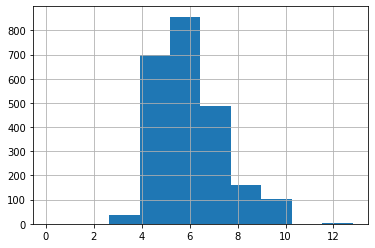

In [324]:
df.ABV.hist()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [41]:
df.ABV.isnull().sum()

68

In [42]:
df.ABV.notnull().sum()

2348

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [47]:
df.Location.value_counts().head(10)

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## List all of the beer from Brooklyn, NY

In [53]:
df[df.Location == 'Brooklyn, NY'].Beer.unique()

array(['4Beans', 'Jammer', 'Abigale', 'Nomader Weiss', 'Rad',
       'Molotov Lite', 'Bengali', 'Sensi Harvest', 'Hi-Res',
       'KelSo Nut Brown Lager', 'Global Warmer', 'Autumnation (2013)',
       'KelSo India Pale Ale', 'The Crisp', 'Sweet Action',
       'Righteous Ale', 'Bengali Tiger', 'KelSo Pilsner',
       'Hipster Ale (Two Roads Brewing)', 'Bikini Beer',
       'East India Pale Ale', '3Beans', 'Brownstone',
       'Brooklyn Summer Ale', 'Hipster Ale (Westbrook Brewing)', 'Apollo',
       'Harbinger', 'Resin', 'Diesel', 'Autumnation (2011-12) (2011)',
       'The Crisp (2011)', 'Sweet Action (2011)', 'Righteous Ale (2011)',
       'Bengali Tiger (2011)', 'Brooklyn Summer Ale (2011)',
       'Brooklyn Lager (16 oz.)', 'Brooklyn Lager (12 oz.)'], dtype=object)

## What brewery in Brooklyn puts out the most cans of beer?

In [54]:
df[df.Location == 'Brooklyn, NY'].Brewery.value_counts()

Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [71]:
df[df.Brewery == 'Sixpoint Craft Ales'].Beer.value_counts().head()

Resin                   1
Apollo                  1
Sweet Action            1
Righteous Ale           1
Righteous Ale (2011)    1
Name: Beer, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [95]:
df[df.Location.str.contains("NY", na=False)].Brewery.unique()

array(['Sixpoint Craft Ales', 'Evil Twin Brewing', 'Chatham Brewing',
       'Newburgh Brewing Company', 'Southampton Publick House',
       'Montauk Brewing Company', 'Matt Brewing Company',
       'The Bronx Brewery', 'KelSo Beer Company', 'Brooklyn Brewery',
       'The Manhattan Brewing Company', 'Blue Point Brewing Company',
       'Bomb Beer Company', 'Dundee Brewing Company',
       'Upstate Brewing Company', 'Butternuts Beer and Ale'], dtype=object)

### Now *count* all of the breweries in New York state

In [108]:
df[df.Location.str.contains("NY", na=False)].Brewery.value_counts().sum()

74

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [181]:
df_IPA = df[df.Style.str.contains('IPA', na=False)]
df_IPA

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00%,68.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.60%,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.00%,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.00%,100.0
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.70%,120.0
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.20%,99.0
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.00%,65.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.90%,100.0


In [179]:
df_IPA.IBUs.value_counts()

70.0     44
65.0     31
60.0     28
75.0     24
85.0     22
         ..
89.0      1
135.0     1
108.0     1
126.0     1
118.0     1
Name: IBUs, Length: 71, dtype: int64

IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [174]:
df_IPA.IBUs.mean()

TypeError: Could not convert 506868651008510042Does not applyDoes not applyDoes not applyDoes not applyDoes not apply4765357246Does not apply90Does not apply4590Does not apply80Does not applyDoes not applyDoes not apply60Does not applyDoes not apply100Does not applyDoes not apply477044Does not applyDoes not applyDoes not apply68Does not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not apply708245Does not apply7590115Does not apply69Does not apply35Does not apply40115Does not apply756563Does not apply67Does not apply661267561707072858210087Does not apply881035875Does not apply726589Does not apply706082100607035Does not apply60Does not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not apply73Does not apply654170Does not apply6570Does not apply75556950757577Does not apply62100Does not apply858675646038Does not applyDoes not applyDoes not apply118Does not apply6965408161Does not apply6280Does not apply50Does not apply1306499Does not apply70Does not apply6975Does not apply65Does not apply407665Does not apply5560Does not apply8875757575Does not applyDoes not applyDoes not apply407055Does not applyDoes not applyDoes not applyDoes not applyDoes not apply80Does not apply726533804242Does not applyDoes not apply50Does not apply4590684035657730854480Does not apply73666787Does not apply75375550456075Does not applyDoes not applyDoes not apply6180Does not apply108Does not apply6072Does not applyDoes not applyDoes not applyDoes not apply7460556810451Does not apply60Does not applyDoes not applyDoes not apply45Does not apply11060608365Does not apply6070691116060607564Does not applyDoes not apply7570135959388704870Does not apply45Does not apply859992Does not apply45Does not applyDoes not apply80100Does not apply104928510010074Does not apply8064Does not apply6510169559470658565Does not applyDoes not apply3069856280Does not applyDoes not apply1006051Does not apply617570115Does not applyDoes not apply1003570Does not apply7785747565606662757442Does not apply908685858045Does not apply9065Does not apply60Does not apply6080Does not apply6547866676Does not apply7050Does not apply95Does not applyDoes not apply42Does not applyDoes not applyDoes not apply5275Does not applyDoes not apply70100Does not apply70Does not applyDoes not applyDoes not apply65707060Does not apply70Does not apply6912070Does not apply825130856537Does not applyDoes not applyDoes not apply70110110100Does not apply70Does not applyDoes not apply4550Does not apply138757570Does not apply367144705545105Does not apply90Does not applyDoes not apply10010080100115Does not applyDoes not apply43Does not apply8585707070949442Does not apply836565707086100608585Does not applyDoes not applyDoes not apply40Does not applyDoes not applyDoes not applyDoes not apply851004444Does not apply75Does not apply9164Does not applyDoes not apply65701007255103Does not apply556067Does not apply44656547Does not apply705560708070Does not apply77Does not apply62Does not apply52Does not apply7090Does not apply48Does not apply70Does not apply9070Does not apply606870941006965627074606085Does not apply70120528047Does not applyDoes not applyDoes not applyDoes not apply9085978510364Does not applyDoes not apply688069Does not applyDoes not applyDoes not apply42706993606565Does not applyDoes not apply65Does not apply8285Does not apply9465113120996510085 to numeric

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [180]:
df_IPA.IBUs.mean()

71.94897959183673

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

<AxesSubplot:>

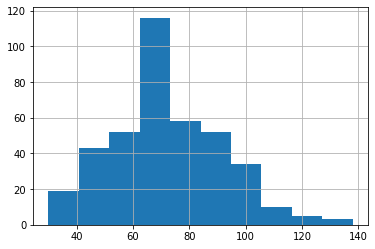

In [184]:
df_IPA.IBUs.hist(bins=10)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [187]:
df_IPA.IBUs.describe()

count    392.000000
mean      71.948980
std       19.545669
min       30.000000
25%       60.000000
50%       70.000000
75%       85.000000
max      138.000000
Name: IBUs, dtype: float64

In [192]:
df_IPA.Beer[df_IPA.IBUs > 85]

24          Habitus (2014)
27                 Habitus
79              The Gadget
89              Gone A-Rye
110                Jah Mon
               ...        
2382           Caldera IPA
2394               113 IPA
2403          Abrasive Ale
2406               Furious
2412    GUBNA Imperial IPA
Name: Beer, Length: 82, dtype: object

## List all of the beers with IBUs below the 25th percentile

In [193]:
df_IPA.Beer[df_IPA.IBUs < 60]

0                                   Get Together
33                                      Villager
55                                      Nordskye
61                                Grapefruit IPA
71                                      Thai.p.a
                          ...                   
2070                                 Jockamo IPA
2093    Trailhead India Style Session Ale (2011)
2185              Northern Lights India Pale Ale
2195                                Hop Knot IPA
2299                          Harpoon IPA (2010)
Name: Beer, Length: 76, dtype: object

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [234]:
df_IPA.groupby('Style').IBUs.median()

Style
American Double / Imperial IPA    91.0
American IPA                      69.0
American White IPA                45.0
Belgian IPA                       61.0
English India Pale Ale (IPA)      47.0
Name: IBUs, dtype: float64

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [282]:
df_high = df_IPA[df_IPA.IBUs > 85]
df_high.groupby('Style').count().sort_values(by='Beer', ascending=False).head(5)

,Beer,Brewery,Location,Size,ABV,IBUs
Style,,,,,,
American Double / Imperial IPA,46,46,46,46,46,46
American IPA,35,35,35,35,35,35
English India Pale Ale (IPA),1,1,1,1,1,1


In [280]:
df_low = df_IPA[df_IPA.IBUs < 60]
df_low.groupby('Style').count().sort_values(by='Beer', ascending=False).head(5)

,Beer,Brewery,Location,Size,ABV,IBUs
Style,,,,,,
American IPA,65,65,65,65,65,65
English India Pale Ale (IPA),5,5,5,5,5,5
American White IPA,4,4,4,4,4,4
American Double / Imperial IPA,1,1,1,1,1,1
Belgian IPA,1,1,1,1,1,1


## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [304]:
styles = ['Witbier', 'Hefeweizen', 'American Pale Wheat Ale']

df[df.Style.isin(styles)].IBUs.mean()

18.982142857142858

## Draw a histogram of the IBUs of those beers

<AxesSubplot:>

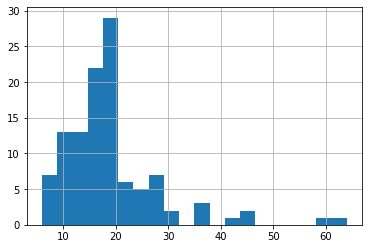

In [306]:
df[df.Style.isin(styles)].IBUs.hist(bins=20)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [315]:
df[df.Style.str.contains('IPA', na=False)].IBUs.mean()

71.94897959183673

<AxesSubplot:>

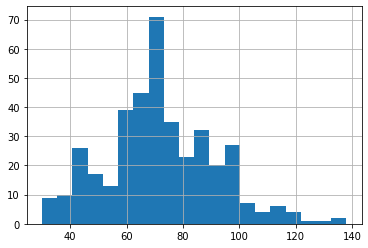

In [316]:
df[df.Style.str.contains('IPA', na=False)].IBUs.hist(bins=20)

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

(...except totally different)

<AxesSubplot:>

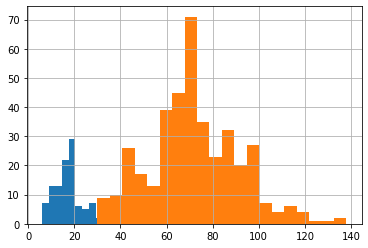

In [319]:
ax = df[df.Style.isin(styles)].IBUs.hist(bins=20)
df[df.Style.str.contains('IPA', na=False)].IBUs.hist(bins=20, ax=ax)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [325]:
df[df.Style.isin(styles)].ABV.mean()

5.043715846994536

In [326]:
df[df.Style.str.contains('IPA', na=False)].ABV.mean()

6.879285714285714

In [331]:
print(f"Wheat bears ABV is {df[df.Style.isin(styles)].ABV.mean():.2f} vs IPAs are {df[df.Style.str.contains('IPA', na=False)].ABV.mean():.2f}")

Wheat bears ABV is 5.04 vs IPAs are 6.88


## Good work!

If you made it this far you deserve a drink.